In [1]:
import pandas as pd
from requests import Request, Session
import json
import time
import webbrowser
import pprint
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Get data from Coinmarketcap API
def get_crypto_data(number_of_cyptos, key):
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' # Coinmarketcap API url

    parameters = {'limit':number_of_cyptos} # API parameters to pass to obtain 1000 cryptos according to market cap

    headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': key # API Key (use your own I'll erase mine)
    } 

    session = Session()
    session.headers.update(headers)

    response = session.get(url, params=parameters)

    info = json.loads(response.text) # Save the json file in the info variable
    return info

In [3]:
data = get_crypto_data('1000', '4e5792a5-717a-483d-8370-7883a6b9543b')

In [4]:
pprint.pprint(data)

{'data': [{'circulating_supply': 19211562,
           'cmc_rank': 1,
           'date_added': '2013-04-28T00:00:00.000Z',
           'id': 1,
           'last_updated': '2022-11-19T14:38:00.000Z',
           'max_supply': 21000000,
           'name': 'Bitcoin',
           'num_market_pairs': 9849,
           'platform': None,
           'quote': {'USD': {'fully_diluted_market_cap': 349578431922.38,
                             'last_updated': '2022-11-19T14:38:00.000Z',
                             'market_cap': 319807034225.6956,
                             'market_cap_dominance': 38.4885,
                             'percent_change_1h': -0.01195723,
                             'percent_change_24h': -0.39510833,
                             'percent_change_30d': -13.66619435,
                             'percent_change_60d': -12.06614312,
                             'percent_change_7d': -1.26141977,
                             'percent_change_90d': -22.18279754,
                

KeyboardInterrupt: 

In [5]:
# convert the JSON to a data frame that you can work with.
def convert_json(df):    
    a = df['data']
    df2 = pd.DataFrame.from_dict(a)
    del df2['tags']
    del df2['platform']
    

    usd = []
    for i in df2['quote']:
        usd.append(i['USD'])

    usd_data = pd.DataFrame(usd)

    cryptos = pd.merge(df2, usd_data, left_index=True, right_index=True)
    
    return cryptos

In [6]:
df = convert_json(data)

In [7]:
df.head(5)

,id,name,symbol,slug,num_market_pairs,date_added,max_supply,circulating_supply,total_supply,cmc_rank,...,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,tvl,last_updated_y
0,1,Bitcoin,BTC,bitcoin,9849,2013-04-28T00:00:00.000Z,21000000.0,1.921156e+07,1.921156e+07,1,...,-0.395108,-1.261420,-13.666194,-12.066143,-22.182798,3.198070e+11,38.4885,3.495784e+11,NaN,2022-11-19T14:38:00.000Z
1,1027,Ethereum,ETH,ethereum,6205,2015-08-07T00:00:00.000Z,NaN,1.223739e+08,1.223739e+08,2,...,-0.664269,-4.654914,-7.424774,-9.868038,-25.093497,1.477939e+11,17.7869,1.477939e+11,NaN,2022-11-19T14:38:00.000Z
2,825,Tether,USDT,tether,42432,2015-02-25T00:00:00.000Z,NaN,6.594494e+10,7.314177e+10,3,...,-0.017294,0.059514,-0.087551,-0.096426,-0.081214,6.589002e+10,7.9285,7.308086e+10,NaN,2022-11-19T14:38:00.000Z
3,3408,USD Coin,USDC,usd-coin,7048,2018-10-08T00:00:00.000Z,NaN,4.438991e+10,4.438991e+10,4,...,0.003607,-0.012140,0.007024,0.027296,0.016538,4.439758e+10,5.3426,4.439758e+10,NaN,2022-11-19T14:38:00.000Z
4,1839,BNB,BNB,bnb,1140,2017-07-25T00:00:00.000Z,200000000.0,1.599732e+08,1.599800e+08,5,...,-0.810329,-4.381167,-0.935250,1.241720,-9.192904,4.322730e+10,5.2024,5.404316e+10,NaN,2022-11-19T14:38:00.000Z


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                1000 non-null   int64  
 1   name                              1000 non-null   object 
 2   symbol                            1000 non-null   object 
 3   slug                              1000 non-null   object 
 4   num_market_pairs                  1000 non-null   int64  
 5   date_added                        1000 non-null   object 
 6   max_supply                        673 non-null    float64
 7   circulating_supply                1000 non-null   float64
 8   total_supply                      1000 non-null   float64
 9   cmc_rank                          1000 non-null   int64  
 10  self_reported_circulating_supply  327 non-null    float64
 11  self_reported_market_cap          327 non-null    float64
 12  tvl_rat

In [11]:
df.columns

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'max_supply', 'circulating_supply', 'total_supply', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated_x', 'quote', 'price', 'volume_24h',
       'volume_change_24h', 'percent_change_1h', 'percent_change_24h',
       'percent_change_7d', 'percent_change_30d', 'percent_change_60d',
       'percent_change_90d', 'market_cap', 'market_cap_dominance',
       'fully_diluted_market_cap', 'tvl', 'last_updated_y'],
      dtype='object')

In [23]:
# Get a dataframe and a plot of n top cryptos. Logy True if you want a logaritmic comparison, False for %
def market_cap_n_plot(n, df, title, logy):
    
    plt.style.use('ggplot')
    plt.rcParams["figure.figsize"] = (10,5)

    market_cap_df = df[['name', 'market_cap']]
    market_cap_top20 = market_cap_df.head(n).set_index('name')
    market_cap_top20 = market_cap_top20.assign(market_cap_percentage = lambda i:(i.market_cap / market_cap_df.market_cap.sum())*100)
    print(market_cap_top20)

    ax = market_cap_top20.market_cap_percentage.plot.bar(title=title, logy=logy)
    ax.set_ylabel('')
    ax.set_xlabel('Crypto Name')     

                   market_cap  market_cap_percentage
name                                                
Bitcoin          3.198070e+11              37.078254
Ethereum         1.477939e+11              17.135145
Tether           6.589002e+10               7.639253
USD Coin         4.439758e+10               5.147431
BNB              4.322730e+10               5.011750
Binance USD      2.288172e+10               2.652894
XRP              1.907140e+10               2.211128
Cardano          1.114247e+10               1.291852
Dogecoin         1.113356e+10               1.290819
Polygon          7.500864e+09               0.869646
Polkadot         6.319707e+09               0.732703
Dai              5.896542e+09               0.683642
Shiba Inu        4.996148e+09               0.579251
TRON             4.779194e+09               0.554097
Solana           4.608953e+09               0.534359
Litecoin         4.548076e+09               0.527301
Uniswap          4.393716e+09               0.

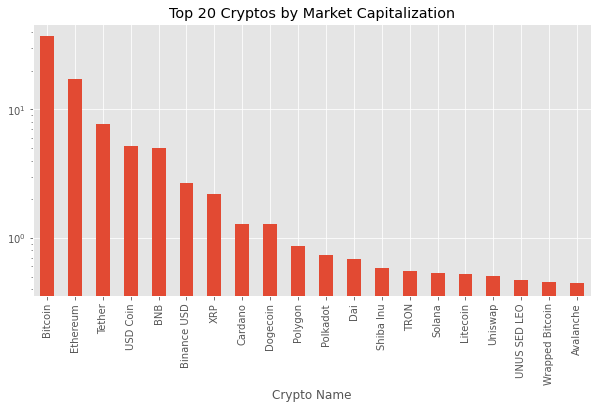

In [24]:
market_cap_n_plot(20, df, 'Top 20 Cryptos by Market Capitalization', True)

In [16]:
# I will work with the following columns:
# 'name','percent_change_24h','percent_change_7d', 'percent_change_30d', 'percent_change_60d'

volatility = df[:50][['name','percent_change_24h','percent_change_7d', 'percent_change_30d', 'percent_change_60d', 'percent_change_90d']] 
volatility = volatility.set_index('name')

volatility24hs = volatility.sort_values('percent_change_24h', ascending=False)
volatility7d = volatility.sort_values('percent_change_7d', ascending=False)
volatility30d = volatility.sort_values('percent_change_30d', ascending=False)
volatility60d = volatility.sort_values('percent_change_60d', ascending=False)
volatility90d = volatility.sort_values('percent_change_90d', ascending=False)    

In [17]:
# Plot Volatilities
def top15_plot(n, volatility_series, title):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
    ax = volatility_series[:n].plot.bar(color='green', ax=axes[0])
    fig.suptitle(title)
    ax.set_ylabel('% Change')
    ax = volatility_series[-n:].plot.bar(color='red', ax=axes[1])
    return fig, ax

(<Figure size 864x288 with 2 Axes>, <AxesSubplot:xlabel='name'>)

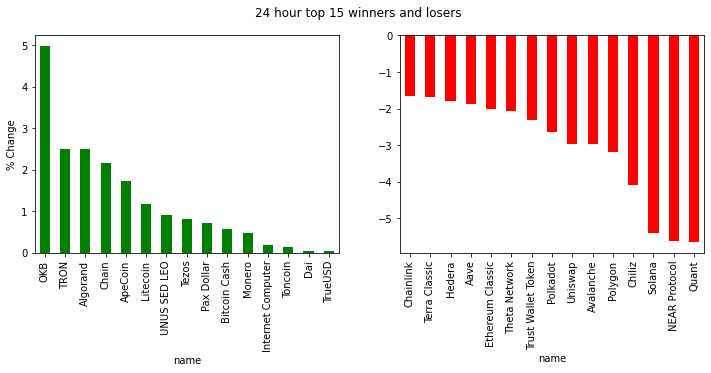

In [18]:
top15_plot(15, volatility24hs.percent_change_24h, '24 hour top 15 winners and losers')

(<Figure size 864x288 with 2 Axes>, <AxesSubplot:xlabel='name'>)

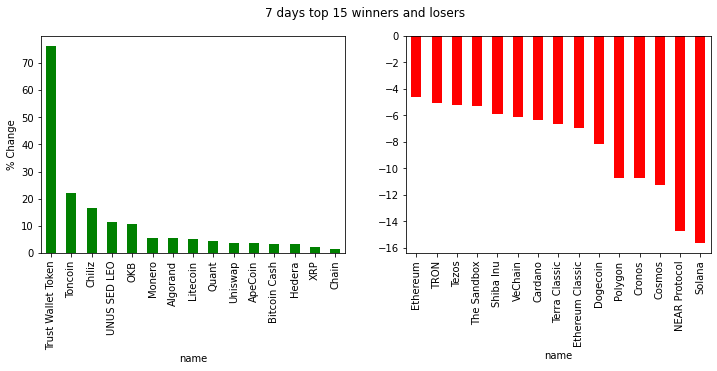

In [19]:
top15_plot(15, volatility7d.percent_change_7d, '7 days top 15 winners and losers')

(<Figure size 864x288 with 2 Axes>, <AxesSubplot:xlabel='name'>)

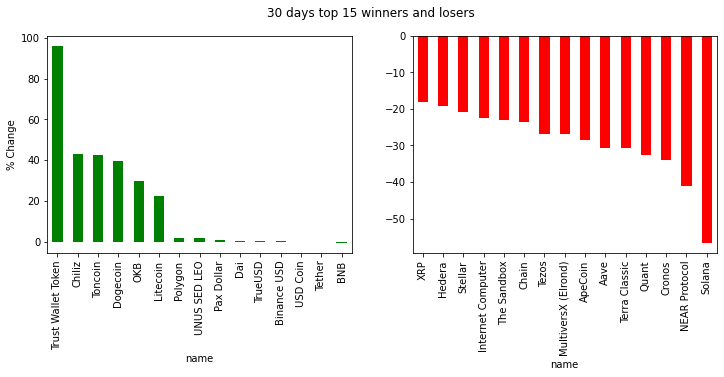

In [20]:
top15_plot(15, volatility30d.percent_change_30d, '30 days top 15 winners and losers')

(<Figure size 864x288 with 2 Axes>, <AxesSubplot:xlabel='name'>)

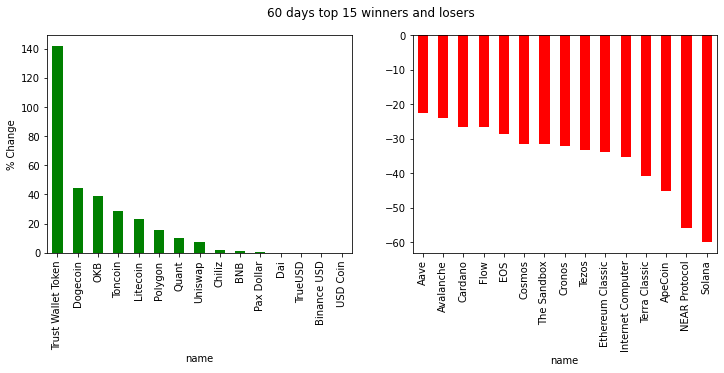

In [21]:
top15_plot(15, volatility60d.percent_change_60d, '60 days top 15 winners and losers')

(<Figure size 864x288 with 2 Axes>, <AxesSubplot:xlabel='name'>)

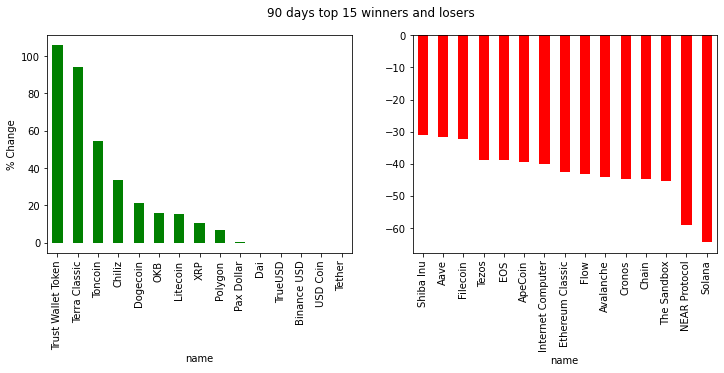

In [22]:
top15_plot(15, volatility90d.percent_change_90d, '90 days top 15 winners and losers')

In [25]:
# get statistics df
def get_statistics(data):
   return data[['price','volume_24h', 'percent_change_24h', 'percent_change_7d', 'percent_change_30d', 'percent_change_60d','percent_change_90d', 'market_cap']].describe()

In [27]:
# Lets get the statistics of top 100 cryptos
get_statistics(df[:99])

,price,volume_24h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap
count,9.900000e+01,9.900000e+01,99.000000,99.000000,99.000000,99.000000,99.000000,9.900000e+01
mean,3.859122e+02,6.661759e+08,-0.512335,-0.520535,-12.727087,-13.960250,-19.963958,8.151155e+09
std,2.353715e+03,3.328058e+09,1.974993,10.100609,21.054669,24.507027,28.476885,3.603200e+10
min,6.671365e-07,7.597218e+05,-5.938876,-15.615312,-56.683252,-60.079966,-92.613309,2.791544e+08
25%,2.967588e-01,1.071848e+07,-1.582185,-5.120425,-25.133966,-28.748647,-39.012707,4.095283e+08
50%,1.012406e+00,2.582424e+07,-0.509396,-1.182511,-15.813731,-14.859466,-24.127676,8.135873e+08
75%,8.533413e+00,1.098066e+08,0.544306,2.095984,-3.088468,-0.790125,-2.585405,2.241597e+09
max,1.664659e+04,2.653035e+10,4.991192,76.183104,96.264209,141.919738,105.824658,3.198070e+11


In [26]:
#plot statistics
def plot_statistics(data, title):
    sns.set(style='ticks')
    facecolor = '#fafafa'
    fig, ax = plt.subplots(figsize=(10, 6), facecolor=facecolor)
    ax = sns.boxplot(data=data[['percent_change_24h','percent_change_7d', 'percent_change_30d', 'percent_change_60d','percent_change_90d']], 
                     linewidth=1, 
                     fliersize=1, 
                     flierprops=dict(marker='x', markersize=4))

    title = title
    fig.suptitle(title, fontsize=12)
    return ax, fig

(<AxesSubplot:>, <Figure size 720x432 with 1 Axes>)

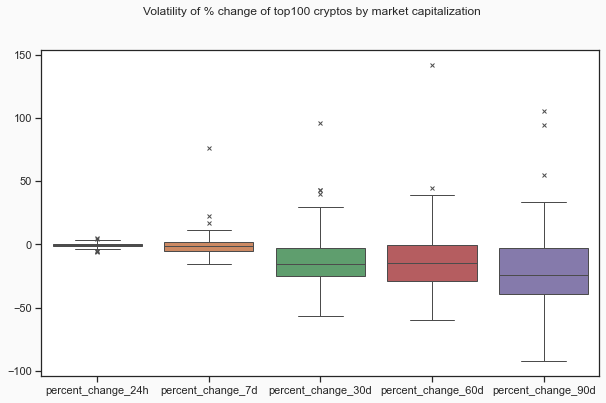

In [29]:
# Lets get the statistics of top 100 cryptos
plot_statistics(df[:99], 'Volatility of % change of top100 cryptos by market capitalization')

In [30]:
# get symbol name and percentage of max crypto % change and min crypto % change
def get_max_min_crypto_change(data):
    df =data[['name','symbol', 'percent_change_24h','percent_change_7d', 'percent_change_30d', 'percent_change_60d','percent_change_90d']]
    print('\033[1m'+'24hs max'+'\033[0m')
    print(df[['symbol','name','percent_change_24h']].loc[df['percent_change_24h'].idxmax()])
    print("")
    print('\033[1m'+'7 days max'+'\033[0m')
    print(df[['symbol','name','percent_change_7d']].loc[df['percent_change_7d'].idxmax()])
    print("")
    print('\033[1m'+'30 days max'+'\033[0m')
    print(df[['symbol','name','percent_change_30d']].loc[df['percent_change_30d'].idxmax()])
    print("")
    print('\033[1m'+'60 days max'+'\033[0m')
    print(df[['symbol','name','percent_change_60d']].loc[df['percent_change_60d'].idxmax()])
    print("")
    print('\033[1m'+'90 days max'+'\033[0m')
    print(df[['symbol','name','percent_change_90d']].loc[df['percent_change_90d'].idxmax()])
    print("")
    print('\033[1m'+'24hs min'+'\033[0m')
    print(df[['symbol','name','percent_change_24h']].loc[df['percent_change_24h'].idxmin()])
    print("")
    print('\033[1m'+'7 days min'+'\033[0m')
    print(df[['symbol','name','percent_change_7d']].loc[df['percent_change_7d'].idxmin()])
    print("")
    print('\033[1m'+'30 days min'+'\033[0m')
    print(df[['symbol','name','percent_change_30d']].loc[df['percent_change_30d'].idxmin()])
    print("")
    print('\033[1m'+'60 days min'+'\033[0m')
    print(df[['symbol','name','percent_change_60d']].loc[df['percent_change_60d'].idxmin()])
    print("")
    print('\033[1m'+'90 days min'+'\033[0m')
    print(df[['symbol','name','percent_change_90d']].loc[df['percent_change_90d'].idxmin()])

In [31]:
get_max_min_crypto_change(df[:100])

24hs max
symbol                     OKB
name                       OKB
percent_change_24h    4.991192
Name: 35, dtype: object

7 days max
symbol                              TWT
name                 Trust Wallet Token
percent_change_7d             76.183104
Name: 44, dtype: object

30 days max
symbol                               TWT
name                  Trust Wallet Token
percent_change_30d             96.264209
Name: 44, dtype: object

60 days max
symbol                               TWT
name                  Trust Wallet Token
percent_change_60d            141.919738
Name: 44, dtype: object

90 days max
symbol                               TWT
name                  Trust Wallet Token
percent_change_90d            105.824658
Name: 44, dtype: object

24hs min
symbol                    KAVA
name                      Kava
percent_change_24h   -5.938876
Name: 95, dtype: object

7 days min
symbol                     SOL
name                    Solana
percent_change_7d   -15.615312
Name: 

In [32]:
# Get stablecoins
def get_stablecoins(df, n):
    stablecoins = df[(df.price > 0.995) & (df.price < 1.005)]
    return stablecoins

In [34]:
stablecoins = get_stablecoins(df, 20)

In [48]:
stablecoins['name'].unique()

array(['Tether', 'USD Coin', 'Binance USD', 'Dai', 'TrueUSD',
       'Origin Dollar', 'sUSD', 'mStable USD', 'Reserve', 'USDK'],
      dtype=object)

In [54]:
print(stablecoins.name)

2             Tether
3           USD Coin
5        Binance USD
11               Dai
48           TrueUSD
325    Origin Dollar
334             sUSD
366      mStable USD
438          Reserve
440             USDK
Name: name, dtype: object


                 market_cap  market_cap_percentage
name                                              
Tether         6.589002e+10              47.023157
USD Coin       4.439758e+10              31.684833
Binance USD    2.288172e+10              16.329797
Dai            5.896542e+09               4.208134
TrueUSD        8.613184e+08               0.614690
Origin Dollar  4.930989e+07               0.035191
sUSD           4.749871e+07               0.033898
mStable USD    4.101202e+07               0.029269
Reserve        2.881647e+07               0.020565
USDK           2.867888e+07               0.020467


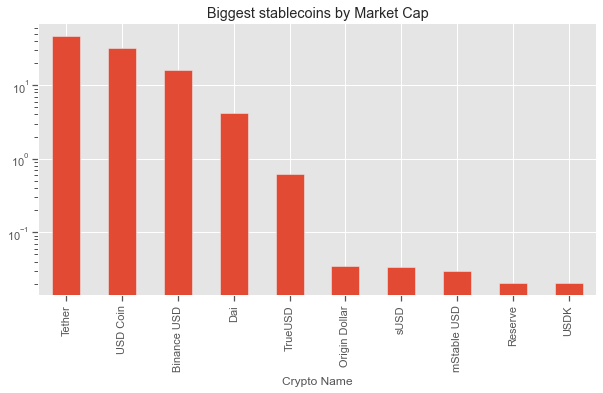

In [55]:
market_cap_n_plot(100, stablecoins, 'Biggest stablecoins by Market Cap', True)

In [56]:
get_statistics(stablecoins[:100])

,price,volume_24h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap
count,10.000000,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01
mean,1.000085,3.285359e+09,0.038049,0.028636,0.053018,0.261617,0.051839,1.401225e+10
std,0.001445,8.271834e+09,0.144034,0.145799,0.224968,0.452200,0.149553,2.335309e+10
min,0.998200,0.000000e+00,-0.181096,-0.172383,-0.406171,-0.123732,-0.224909,2.867888e+07
25%,0.998903,2.203566e+06,-0.030937,-0.021559,0.007773,0.028116,0.017628,4.263369e+07
50%,1.000171,2.007104e+07,0.001803,-0.005773,0.020949,0.068191,0.030565,4.553141e+08
75%,1.000411,1.704349e+09,0.041789,0.044636,0.130435,0.449191,0.112015,1.863542e+10
max,1.002755,2.653035e+10,0.288564,0.341377,0.393255,1.329859,0.332190,6.589002e+10


In [57]:
get_max_min_crypto_change(stablecoins[:4])

24hs max
symbol                     DAI
name                       Dai
percent_change_24h    0.044396
Name: 11, dtype: object

7 days max
symbol                   USDT
name                   Tether
percent_change_7d    0.059514
Name: 2, dtype: object

30 days max
symbol                     DAI
name                       Dai
percent_change_30d    0.060073
Name: 11, dtype: object

60 days max
symbol                     DAI
name                       Dai
percent_change_60d    0.102383
Name: 11, dtype: object

90 days max
symbol                     DAI
name                       Dai
percent_change_90d    0.079873
Name: 11, dtype: object

24hs min
symbol                       BUSD
name                  Binance USD
percent_change_24h      -0.035485
Name: 5, dtype: object

7 days min
symbol                      BUSD
name                 Binance USD
percent_change_7d      -0.093856
Name: 5, dtype: object

30 days min
symbol                    USDT
name                    Tether
percent_change_